# Formula 1 Data Driver Analysis

The data is composed of the following variables:
* `car_number`: the number of the car
* `grid_starting_position`: the starting position of the car in the grid
* `final_position`: the position in which that driver ended
* `points`: the points earned by the driver in the race
* `laps`: the number of laps completed by the driver
* `total_race_time_ms`: the total time the driver took to complete the race in milliseconds
* `fastest_lap`: the fastest lap completed by the driver
* `rank`: the rank of the driver in the race
* `fastest_lap_time`: the time taken to complete the fastest lap
* `fastest_lap_speed`: the speed of the fastest lap
* `year`: the year of the race
* `race_number_season`: the number of the race in the season
* `race_name`: the name of the race
* `race_date`: the date of the race
* `race_start_time`: the start time of the race
* `circuit_name`: the name of the circuit where the race took place
* `circuit_location`: the location of the circuit
* `circuit_country`: the country where the circuit is located
* `circuit_lat`: the latitude of the circuit
* `circuit_lng`: the longitude of the circuit
* `circuit_altitude`: the altitude of the circuit
* `driver`: the name of the driver
* `driver_dob`: the date of birth of the driver
* `driver_nationality`: the nationality of the driver
* `constructor_name`: the name of the constructor team
* `constructor_nationality`: the nationality of the constructor team
* `status`: the status of the driver in the race (e.g., Finished, Did Not Finish, etc.)

In [43]:
import pandas as pd

file_path = 'f1_data.csv'
df = pd.read_csv(file_path)

pd.set_option('display.max_columns', None)

print(df.head(10))

   car_number  grid_starting_position  final_position  points  laps  \
0        22.0                       1             1.0    10.0    58   
1         3.0                       5             2.0     8.0    58   
2         7.0                       7             3.0     6.0    58   
3         5.0                      11             4.0     5.0    58   
4        23.0                       3             5.0     4.0    58   
5         8.0                      13             6.0     3.0    57   
6        14.0                      17             7.0     2.0    55   
7         1.0                      15             8.0     1.0    53   
8         4.0                       2             NaN     0.0    47   
9        12.0                      18             NaN     0.0    43   

   total_race_time_ms  fastest_lap  rank fastest_lap_time  fastest_lap_speed  \
0           5690616.0         39.0   2.0         1:27.452            218.300   
1           5696094.0         41.0   3.0         1:27.739 

In [44]:
print(len(df))
print(len(df.columns))

26080
27


In [45]:
df.dtypes

car_number                 float64
grid_starting_position       int64
final_position             float64
points                     float64
laps                         int64
total_race_time_ms         float64
fastest_lap                float64
rank                       float64
fastest_lap_time            object
fastest_lap_speed          float64
year                         int64
race_number_season           int64
race_name                   object
race_date                   object
race_start_time             object
circuit_name                object
circuit_location            object
circuit_country             object
circuit_lat                float64
circuit_lng                float64
circuit_altitude           float64
driver                      object
driver_dob                  object
driver_nationality          object
constructor_name            object
constructor_nationality     object
status                      object
dtype: object

In [46]:
df['driver_dob'] = pd.to_datetime(df['driver_dob'])
df['race_date'] = pd.to_datetime(df['race_date'])

df['age'] = ((df['race_date'] - df['driver_dob']).dt.days) / 365.25

## 🛠️ Constructor Analytics: Key Insights

We used the dataset to identify constructors with notable records in Formula 1 history. Each insight below was derived by querying and aggregating the race data:

- **Constructor with the Most Wins**: We filtered all races where a team finished 1st (`final_position == 1`) and found the constructor that appears most frequently among winners. This reveals the most successful constructor in terms of race victories.

- **Constructor with the Most Podiums**: We expanded the filter to include all podium positions (1st, 2nd, and 3rd), and identified the constructor that has appeared on the podium most often.

- **Constructor with the Most Unfinished Races**: Using `NaN` values in `final_position` as an indicator of a "Did Not Finish" (DNF), we identified the constructor most frequently associated with retirements or disqualifications.

- **Nationality with the Most Wins**: By looking at the `constructor_nationality` field for all race wins, we determined which country has produced the most winning teams.

- **Constructor with the Longest Presence in F1**: By finding the most frequently appearing constructor in the dataset overall (across all races), we inferred which team has had the longest history in the sport.

- **Constructor with the Most Unique Drivers**: Finally, we grouped the data by constructor and counted the number of unique drivers who have raced for each one. This gives insight into which team has rotated through the most talent over the years.

The following code block executes these queries to surface these historical insights from the dataset.

In [47]:
most_wins_constructor = df[df['final_position'] == 1]['constructor_name'].mode()[0]

print(most_wins_constructor)

most_podiums_constructor = df[(df['final_position'] == 1) | (df['final_position'] == 2) | (df['final_position'] == 3)]['constructor_name'].mode()[0]

print(most_podiums_constructor)

most_unfinished_constructor = df[pd.isna(df['final_position'])]['constructor_name'].mode()[0]

print(most_unfinished_constructor)

most_wins_nationality = df[df['final_position'] == 1]['constructor_nationality'].mode()[0]

print(most_wins_nationality)

longest_history_constructors = df['constructor_name'].mode()[0]

print(longest_history_constructors)

constructor_driver_counts = df.groupby('constructor_name')['driver'].nunique()
most_drivers_constructor = constructor_driver_counts.idxmax()

print(most_drivers_constructor)




Ferrari
Ferrari
Ferrari
British
Ferrari
Ferrari


## 🔍 Driver Analytics: What We Explored

Using the full race history dataset, we performed a series of targeted analytics to better understand individual and national-level performance in Formula 1. Here’s what was calculated and how:

- **Fastest Driver**: Based on performance data, we identified the driver with the highest win ratio relative to their number of races, giving us insight into who maximized their opportunities best.

- **Most Podiums Without a Win**: We filtered for drivers who never won a race (no 1st-place finishes) and determined who had the most podium finishes (2nd or 3rd place) despite never reaching the top step.

- **Podium Probability by Country**: For each driver nationality, we calculated the historical probability of having a driver finish on the podium. This was done by dividing the number of podium finishes by the total number of race entries for that nationality.

- **Win Probability by Country**: Similarly, we computed the probability of each country producing a race-winning driver, again normalized by total race entries.

- **Youngest Race Winner**: We found the youngest driver to win a Formula 1 race by comparing driver birthdates with the race dates of their first win.

- **Current Drivers with the Longest History**: Finally, we looked at the list of drivers active in the most recent season and determined who among them has the longest tenure in F1, measured by the number of races entered.

Each of these analyses was calculated programmatically using pandas, and the next code block walks through exactly how it was done.

In [48]:
average_lap_times_driver = df.groupby('driver')['fastest_lap_speed'].mean()
fastest_driver = average_lap_times_driver.idxmax()

print(fastest_driver)

driver_most_podiums_no_win = df[df['final_position'] == 1]['constructor_nationality'].mode()[0]

podium_drivers = df[df['final_position'].isin([2, 3])]

drivers_with_wins = df[df['final_position'] == 1]['driver'].unique()
podium_without_win = podium_drivers[~podium_drivers['driver'].isin(drivers_with_wins)]

podium_counts = podium_without_win['driver'].value_counts()

most_podiums_driver = podium_counts.idxmax()

print(most_podiums_driver)

podium_finishes = df[df['final_position'].isin([1, 2, 3])]
country_podium_counts = podium_finishes['driver_nationality'].value_counts()
total_podiums = country_podium_counts.sum()

country_probabilities_podium = (country_podium_counts / total_podiums)

print(country_probabilities_podium)

win_finishes= df[df['final_position'] == 1]
country_win_counts = win_finishes['driver_nationality'].value_counts()
total_wins = country_win_counts.sum()

country_probabilities_win = (country_win_counts)/total_wins

print(country_probabilities_win)

win_finishes= df[df['final_position'] == 1]
youngest_winner = win_finishes.loc[win_finishes['age'].idxmin()]

print(youngest_winner['driver'])








Antônio Pizzonia
Nick Heidfeld
driver_nationality
British          0.225865
German           0.125987
French           0.093807
Brazilian        0.088950
Finnish          0.074378
Italian          0.062842
Australian       0.039466
American         0.039162
Spanish          0.036733
Austrian         0.035823
Argentine        0.029751
Dutch            0.027626
New Zealander    0.021554
Belgian          0.013661
Swedish          0.013358
Mexican          0.012143
Canadian         0.011840
South African    0.010929
Swiss            0.010929
Colombian        0.009107
Monegasque       0.008500
Polish           0.003643
Russian          0.001214
Japanese         0.000911
Thai             0.000607
Portuguese       0.000304
Rhodesian        0.000304
Venezuelan       0.000304
Danish           0.000304
Name: count, dtype: float64
driver_nationality
British          0.282450
German           0.163620
Brazilian        0.092322
French           0.074040
Finnish          0.052102
Dutch            0.

## 🏁 Circuit Analytics: Track-Level Insights from F1 History

To gain a deeper understanding of how circuits influence race outcomes and driver performance, we analyzed race data across all Grand Prix venues. Here’s a breakdown of the key circuit-level insights we extracted:

- **Toughest Circuit in Formula 1**: We identified the circuit with the highest proportion of non-finishers (DNFs) over time. This was based on how often drivers failed to complete the race at each track, making it a strong indicator of circuit difficulty.

- **Circuit Requiring the Most Experience to Win**: By calculating the average number of races completed by drivers before winning at each track, we determined which circuit historically demands the most experience from its winners.

- **Circuit and Year with the Most DNFs**: We searched for the single race event (a combination of circuit and year) that recorded the highest number of unfinished races. This points to a particularly chaotic or challenging race in F1 history.

- **Best Circuit per Constructor (Podium Count)**: For each constructor, we determined their most successful track by counting the number of podium finishes (P1–P3) they've achieved at each circuit. This helps highlight which teams have historically performed better at specific venues.

Each of these insights helps paint a clearer picture of how circuits impact the sport — from testing driver endurance and skill to rewarding constructor-specific strengths. The code that follows performs these computations.

In [49]:
races_per_circuit = (
    df.groupby('circuit_name')['final_position']
    .agg(
        nan_count=lambda x: x.isna().sum(),
        non_nan_count=lambda x: (~x.isna()).sum()
    )
    .assign(ratio=lambda x: x['nan_count'] / x['non_nan_count'])
    .sort_values(by='ratio', ascending=False)
)

races_per_circuit

,nan_count,non_nan_count,ratio
circuit_name,,,
Fair Park,18,8,2.250000
Phoenix street circuit,72,36,2.000000
Sebring International Raceway,12,7,1.714286
Detroit Street Circuit,119,72,1.652778
Long Beach,137,83,1.650602
...,...,...,...
Yas Marina Circuit,41,255,0.160784
Valencia Street Circuit,13,99,0.131313
Losail International Circuit,2,18,0.111111


In [50]:
winners = df[df['final_position'] == 1]

average_age_per_race = winners.groupby('race_name')['age'].mean()
average_age_per_race.idxmax()

'Swiss Grand Prix'

In [51]:
non_finishes = df[df['final_position'].isna()]
non_finishes_count = non_finishes.groupby(['year','race_name']).size()
year_race_with_max_non_finishes = non_finishes_count.idxmax()

year_race_with_max_non_finishes

(1989, 'Australian Grand Prix')

In [52]:
podiums_count.head()

constructor_name  circuit_name                
Alfa Romeo        Autodromo Nazionale di Monza    1
                  Circuit Bremgarten              2
                  Circuit de Monaco               1
                  Circuit de Pedralbes            1
                  Circuit de Spa-Francorchamps    2
dtype: int64

## 🧪 Driver Performance Clustering: How It Was Done

To analyze and group Formula 1 drivers by performance, we used a clustering approach based on two carefully designed metrics:

- **`ratio_points_per_race`**: This represents how efficiently a driver converts race starts into points, adjusted for different scoring systems and season lengths.
- **`win_ratio`**: The percentage of races a driver won, reflecting their dominance and ability to finish first.

These two ratios were used as input features for a **K-Means clustering algorithm**, which classified drivers into performance tiers (e.g., Elite, Consistent, Support). Before clustering, the features were **standardized** to ensure fair comparison, and after clustering, we interpreted and visualized the results using a 2D scatter plot with Plotly.

The following code performs all of these steps.

In [53]:
# Check for inconsistencies in the driver column
df_cleaned = df[['driver']].copy()

# Handle missing values explicitly
df_cleaned = df_cleaned.dropna()

# Ensure the driver column is treated as a string
df_cleaned['driver'] = df_cleaned['driver'].astype(str)

# Calculate the correct row counts
driver_row_counts_corrected = df_cleaned['driver'].value_counts().reset_index()

# Rename columns for clarity
driver_row_counts_corrected.columns = ['driver', 'row_count']

# Sort the results by row_count in descending order
driver_row_counts_corrected_sorted = driver_row_counts_corrected.sort_values(by='row_count', ascending=False).reset_index(drop=True)

# Display the top rows of the corrected counts
print(driver_row_counts_corrected_sorted.head())





               driver  row_count
0     Fernando Alonso        370
1      Kimi Räikkönen        352
2  Rubens Barrichello        326
3      Lewis Hamilton        322
4       Jenson Button        309


In [54]:
df_filtered = df[['driver', 'constructor_name', 'race_name', 'final_position', 'year']].copy()

# Replace NaN in 'final_position' with 24 (for non-finishers)
df_filtered['final_position'] = pd.to_numeric(df_filtered['final_position'], errors='coerce').fillna(24)

# Combine race_name and year to create a unique race identifier
df_filtered['unique_race'] = df_filtered['race_name'].astype(str) + "_" + df_filtered['year'].astype(str)

# Function to compare drivers within a group
def calculate_better_finishes(group):
    # Sort by final position (lower is better)
    group = group.sort_values('final_position').reset_index(drop=True)
    group['better_than_teammate'] = group['final_position'] < group['final_position'].shift(-1)
    return group

# Group by unique_race and constructor_name to compare teammates
df_comparison = df_filtered.groupby(['unique_race', 'constructor_name']).apply(calculate_better_finishes)

# Count the number of races where a driver finished better than their teammate
driver_better_counts = df_comparison.groupby('driver')['better_than_teammate'].sum().reset_index()

# Rename the column for clarity
driver_better_counts.columns = ['driver', 'better_than_teammate_count']

# Order the results by better_than_teammate_count in descending order
driver_better_counts = driver_better_counts.sort_values(by='better_than_teammate_count', ascending=False).reset_index(drop=True)

# Display the ordered results
print(driver_better_counts.head(10))  # Display the top drivers


               driver  better_than_teammate_count
0     Fernando Alonso                         241
1      Lewis Hamilton                         199
2  Michael Schumacher                         193
3    Sebastian Vettel                         178
4      Kimi Räikkönen                         175
5       Jenson Button                         161
6  Rubens Barrichello                         121
7      Max Verstappen                         118
8    Daniel Ricciardo                         115
9        Sergio Pérez                         111


/var/folders/lv/gn03ly3n62g1g9qqycdm72800000gn/T/ipykernel_15163/2929749087.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_comparison = df_filtered.groupby(['unique_race', 'constructor_name']).apply(calculate_better_finishes)


In [55]:
# Merge DataFrames
driver_combined = driver_row_counts_corrected_sorted.merge(driver_better_counts, on='driver', how='inner')

# Calculate Percentage
driver_combined['percentage_above_teammate'] = (
    driver_combined['better_than_teammate_count'] / driver_combined['row_count'] * 100
)

# Sort Results
driver_combined = driver_combined.sort_values(by='percentage_above_teammate', ascending=False).reset_index(drop=True)

# Display or save the final DataFrame
print(driver_combined.head(20))  # Show top drivers


                       driver  row_count  better_than_teammate_count  \
0                Dennis Poore          2                           2   
1   Alberto Rodriguez Larreta          1                           1   
2              Larry Crockett          1                           1   
3                 Don Beauman          1                           1   
4                Chuck Arnold          1                           1   
5               Peter Broeker          1                           1   
6                Oscar Gálvez          1                           1   
7           Jonathan Williams          1                           1   
8                 John Barber          1                           1   
9              Robert La Caze          1                           1   
10               George Amick          1                           1   
11                 Guy Tunmer          1                           1   
12               André Guelfi          1                        

In [56]:
# Correct Driver Counts
df_cleaned = df[['driver']].copy()
df_cleaned = df_cleaned.dropna()
df_cleaned['driver'] = df_cleaned['driver'].astype(str)
driver_row_counts_corrected = df_cleaned['driver'].value_counts().reset_index()
driver_row_counts_corrected.columns = ['driver', 'row_count']
driver_row_counts_corrected_sorted = driver_row_counts_corrected.sort_values(by='row_count', ascending=False).reset_index(drop=True)

# Filter drivers with more than 45 races
drivers_with_min_races_60 = driver_row_counts_corrected_sorted[driver_row_counts_corrected_sorted['row_count'] > 45]

# Teammate Comparison DataFrame
df_filtered = df[['driver', 'constructor_name', 'race_name', 'final_position', 'year']].copy()
df_filtered['final_position'] = pd.to_numeric(df_filtered['final_position'], errors='coerce').fillna(24)
df_filtered['unique_race'] = df_filtered['race_name'].astype(str) + "_" + df_filtered['year'].astype(str)


def calculate_better_finishes(group):
    group = group.sort_values('final_position').reset_index(drop=True)
    group['better_than_teammate'] = group['final_position'] < group['final_position'].shift(-1)
    return group


df_comparison = df_filtered.groupby(['unique_race', 'constructor_name']).apply(calculate_better_finishes)
driver_better_counts = df_comparison.groupby('driver')['better_than_teammate'].sum().reset_index()
driver_better_counts.columns = ['driver', 'better_than_teammate_count']

# Merge DataFrames
driver_combined = drivers_with_min_races_60.merge(driver_better_counts, on='driver', how='inner')

# Calculate Percentage
driver_combined['percentage_above_teammate'] = (
    driver_combined['better_than_teammate_count'] / driver_combined['row_count'] * 100
)

# Sort Results
driver_combined = driver_combined.sort_values(by='percentage_above_teammate', ascending=False).reset_index(drop=True)

# Display or save the final DataFrame
print(driver_combined.head(10))  # Show top drivers


               driver  row_count  better_than_teammate_count  \
0         Juan Fangio         58                          40   
1      Max Verstappen        175                         118   
2     Fernando Alonso        370                         241   
3  Michael Schumacher        308                         193   
4       Mike Hawthorn         48                          30   
5      Lewis Hamilton        322                         199   
6           Jim Clark         73                          45   
7      Richie Ginther         54                          33   
8        Lando Norris         94                          57   
9      George Russell         94                          57   

   percentage_above_teammate  
0                  68.965517  
1                  67.428571  
2                  65.135135  
3                  62.662338  
4                  62.500000  
5                  61.801242  
6                  61.643836  
7                  61.111111  
8               

/var/folders/lv/gn03ly3n62g1g9qqycdm72800000gn/T/ipykernel_15163/3607713303.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_comparison = df_filtered.groupby(['unique_race', 'constructor_name']).apply(calculate_better_finishes)


In [57]:
# Define the points mapping according to the current F1 system
points_mapping = {
    1: 25,
    2: 18,
    3: 15,
    4: 12,
    5: 10,
    6: 8,
    7: 6,
    8: 4,
    9: 2,
    10: 1
}

# Apply the points system to create the corrected_points column
df['corrected_points'] = df['final_position'].map(points_mapping).fillna(0).astype(int)

# Display the updated DataFrame
print(df[['driver', 'final_position', 'corrected_points']].head())

df.head(10)

              driver  final_position  corrected_points
0     Lewis Hamilton             1.0                25
1      Nick Heidfeld             2.0                18
2       Nico Rosberg             3.0                15
3    Fernando Alonso             4.0                12
4  Heikki Kovalainen             5.0                10


,car_number,grid_starting_position,final_position,points,laps,total_race_time_ms,fastest_lap,rank,fastest_lap_time,fastest_lap_speed,year,race_number_season,race_name,race_date,race_start_time,circuit_name,circuit_location,circuit_country,circuit_lat,circuit_lng,circuit_altitude,driver,driver_dob,driver_nationality,constructor_name,constructor_nationality,status,age,corrected_points
0,22.0,1,1.0,10.0,58,5690616.0,39.0,2.0,1:27.452,218.300,2008,1,Australian Grand Prix,2008-03-16,04:30:00,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10.0,Lewis Hamilton,1985-01-07,British,McLaren,British,Finished,23.186858,25
1,3.0,5,2.0,8.0,58,5696094.0,41.0,3.0,1:27.739,217.586,2008,1,Australian Grand Prix,2008-03-16,04:30:00,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10.0,Nick Heidfeld,1977-05-10,German,BMW Sauber,German,Finished,30.850103,18
2,7.0,7,3.0,6.0,58,5698779.0,41.0,5.0,1:28.090,216.719,2008,1,Australian Grand Prix,2008-03-16,04:30:00,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10.0,Nico Rosberg,1985-06-27,German,Williams,British,Finished,22.718686,15
3,5.0,11,4.0,5.0,58,5707797.0,58.0,7.0,1:28.603,215.464,2008,1,Australian Grand Prix,2008-03-16,04:30:00,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10.0,Fernando Alonso,1981-07-29,Spanish,Renault,French,Finished,26.631075,12
4,23.0,3,5.0,4.0,58,5708630.0,43.0,1.0,1:27.418,218.385,2008,1,Australian Grand Prix,2008-03-16,04:30:00,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10.0,Heikki Kovalainen,1981-10-19,Finnish,McLaren,British,Finished,26.406571,10
5,8.0,13,6.0,3.0,57,NaN,50.0,14.0,1:29.639,212.974,2008,1,Australian Grand Prix,2008-03-16,04:30:00,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10.0,Kazuki Nakajima,1985-01-11,Japanese,Williams,British,+1 Lap,23.175907,8
6,14.0,17,7.0,2.0,55,NaN,22.0,12.0,1:29.534,213.224,2008,1,Australian Grand Prix,2008-03-16,04:30:00,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10.0,Sébastien Bourdais,1979-02-28,French,Toro Rosso,Italian,Engine,29.045859,6
7,1.0,15,8.0,1.0,53,NaN,20.0,4.0,1:27.903,217.180,2008,1,Australian Grand Prix,2008-03-16,04:30:00,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10.0,Kimi Räikkönen,1979-10-17,Finnish,Ferrari,Italian,Engine,28.413415,4
8,4.0,2,NaN,0.0,47,NaN,15.0,9.0,1:28.753,215.100,2008,1,Australian Grand Prix,2008-03-16,04:30:00,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10.0,Robert Kubica,1984-12-07,Polish,BMW Sauber,German,Collision,23.271732,0
9,12.0,18,NaN,0.0,43,NaN,23.0,13.0,1:29.558,213.166,2008,1,Australian Grand Prix,2008-03-16,04:30:00,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10.0,Timo Glock,1982-03-18,German,Toyota,Japanese,Accident,25.995893,0


In [58]:
# Group by driver to calculate total corrected points and total races
driver_performance_ratio = df.groupby('driver').agg(
    total_corrected_points=('corrected_points', 'sum'),
    total_races=('driver', 'count')  # Count the rows per driver as total races
).reset_index()

# Filter drivers with more than 45 races
driver_performance_ratio = driver_performance_ratio[driver_performance_ratio['total_races'] > 45]

# Calculate the ratio of corrected points to total races
driver_performance_ratio['ratio_points_per_race'] = (
    driver_performance_ratio['total_corrected_points'] / (driver_performance_ratio['total_races'] * 25)
)

# Sort by points_per_race in descending order
driver_performance_ratio = driver_performance_ratio.sort_values(by='ratio_points_per_race', ascending=False).reset_index(drop=True)

# Display the top rows of the sorted DataFrame
print(driver_performance_ratio.head(30))

#--


                driver  total_corrected_points  total_races  \
0       Lewis Hamilton                    4879          322   
1          Juan Fangio                     873           58   
2       Max Verstappen                    2266          175   
3   Michael Schumacher                    3890          308   
4          Alain Prost                    2483          202   
5         Ayrton Senna                    1881          162   
6            Jim Clark                     839           73   
7       Jackie Stewart                    1109          100   
8     Sebastian Vettel                    3287          300   
9        Mike Hawthorn                     463           48   
10          Damon Hill                    1091          122   
11  Juan Pablo Montoya                     825           95   
12        Nico Rosberg                    1739          206   
13       Stirling Moss                     616           73   
14         Denny Hulme                     940         

In [59]:
import pandas as pd

# Filter relevant columns and create unique race identifier
df_filtered = df[['driver', 'constructor_name', 'race_name', 'final_position', 'year']].copy()
df_filtered['final_position'] = pd.to_numeric(df_filtered['final_position'], errors='coerce').fillna(24)
df_filtered['unique_race'] = df_filtered['race_name'].astype(str) + "_" + df_filtered['year'].astype(str)

# Identify the driver with the best (lowest) final position for each constructor in each race
df_filtered['best_position'] = df_filtered.groupby(['unique_race', 'constructor_name'])['final_position'].transform('min')

# Mark if the driver finished with the best position among teammates
df_filtered['better_than_teammates'] = df_filtered['final_position'] == df_filtered['best_position']

# Count the number of races where a driver beat all teammates
driver_wins_against_teammates = df_filtered[df_filtered['better_than_teammates']].groupby('driver').size().reset_index(name='wins_against_teammates')

# Calculate the count of times each driver appears in the dataset
driver_appearance_count = df['driver'].value_counts().reset_index()
driver_appearance_count.columns = ['driver', 'total_appearances']

# Filter for drivers with more than 45 appearances
drivers_with_min_races = driver_appearance_count[driver_appearance_count['total_appearances'] > 45]

# Merge the appearance count with the driver_wins_against_teammates DataFrame
driver_wins_against_teammates = driver_wins_against_teammates.merge(
    drivers_with_min_races, on='driver', how='inner'
)

# Calculate the ratio of wins against teammates to total appearances
driver_wins_against_teammates['win_ratio'] = (
    driver_wins_against_teammates['wins_against_teammates'] /
    driver_wins_against_teammates['total_appearances']
)

# Sort by the win_ratio in descending order
driver_wins_against_teammates = driver_wins_against_teammates.sort_values(by='win_ratio', ascending=False).reset_index(drop=True)

# Display the results
print(driver_wins_against_teammates.head(20))









                driver  wins_against_teammates  total_appearances  win_ratio
0    Gabriele Tarquini                      73                 78   0.935897
1        Nicola Larini                      67                 75   0.893333
2       Yannick Dalmas                      44                 50   0.880000
3   Manfred Winkelhock                      48                 55   0.872727
4     Christian Danner                      41                 47   0.872340
5   Piercarlo Ghinzani                      96                111   0.864865
6           Alex Caffi                      64                 75   0.853333
7      Bertrand Gachot                      71                 84   0.845238
8       Stefano Modena                      67                 81   0.827160
9      Jonathan Palmer                      71                 88   0.806818
10  Olivier Grouillard                      50                 62   0.806452
11  Emerson Fittipaldi                     120                149   0.805369

In [60]:
# Merge the two DataFrames on the 'driver' column
combined_df = driver_performance_ratio.merge(
    driver_wins_against_teammates[['driver', 'win_ratio']],
    on='driver',
    how='inner'
)

# Create a new column for the multiplication of ratio_points_per_race and win_ratio
combined_df['combined_metric'] = combined_df['ratio_points_per_race'] * combined_df['win_ratio']

# Sort by the combined_metric in descending order
combined_df = combined_df.sort_values(by='combined_metric', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
print(combined_df[['driver', 'ratio_points_per_race', 'win_ratio', 'combined_metric']].head(30))


                driver  ratio_points_per_race  win_ratio  combined_metric
0          Juan Fangio               0.602069   0.655172         0.394459
1       Lewis Hamilton               0.606087   0.627329         0.380216
2       Max Verstappen               0.517943   0.697143         0.361080
3         Ayrton Senna               0.464444   0.746914         0.346900
4          Alain Prost               0.491683   0.702970         0.345639
5   Michael Schumacher               0.505195   0.675325         0.341171
6       Jackie Stewart               0.443600   0.660000         0.292776
7            Jim Clark               0.459726   0.616438         0.283393
8     Sebastian Vettel               0.438267   0.626667         0.274647
9        Nelson Piquet               0.324251   0.729469         0.236531
10     Fernando Alonso               0.329081   0.705405         0.232136
11       Mika Häkkinen               0.335030   0.678788         0.227415
12          Damon Hill               0

In [64]:
print(combined_df)

                 driver  total_corrected_points  total_races  \
0           Juan Fangio                     873           58   
1        Lewis Hamilton                    4879          322   
2        Max Verstappen                    2266          175   
3          Ayrton Senna                    1881          162   
4           Alain Prost                    2483          202   
..                  ...                     ...          ...   
163  Antonio Giovinazzi                      21           62   
164  Narain Karthikeyan                      12           48   
165     Marcus Ericsson                      18           97   
166   Esteban Gutiérrez                       6           59   
167     Nicholas Latifi                      10           61   

     ratio_points_per_race  win_ratio  combined_metric  
0                 0.602069   0.655172         0.394459  
1                 0.606087   0.627329         0.380216  
2                 0.517943   0.697143         0.361080  
3  

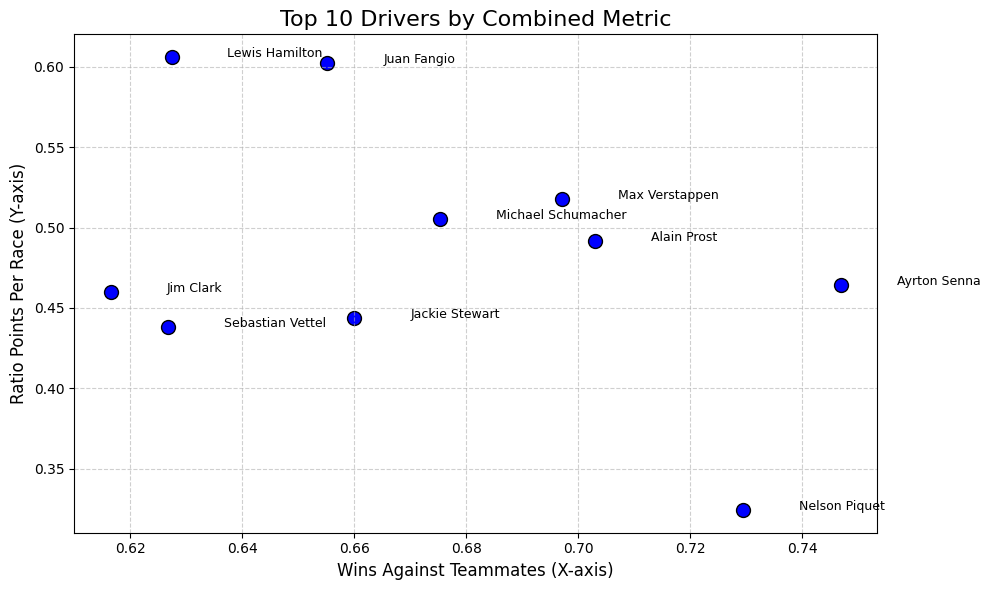

In [61]:
import matplotlib.pyplot as plt

# Select the top 10 drivers by the combined metric
top_10_drivers = combined_df.head(10)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    top_10_drivers['win_ratio'],
    top_10_drivers['ratio_points_per_race'],
    color='blue',
    s=100,
    edgecolors='black'
)

# Annotate each point with the driver's name
for i, row in top_10_drivers.iterrows():
    plt.text(
        row['win_ratio'] + 0.01,  # Slightly offset text to the right
        row['ratio_points_per_race'],
        row['driver'],
        fontsize=9
    )

# Add titles and labels
plt.title('Top 10 Drivers by Combined Metric', fontsize=16)
plt.xlabel('Wins Against Teammates (X-axis)', fontsize=12)
plt.ylabel('Ratio Points Per Race (Y-axis)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


In [80]:
driver_summary = combined_df.groupby('driver').agg(
    ratio_points_per_race=('ratio_points_per_race', 'mean'),
    win_ratio=('win_ratio', 'mean')
).reset_index()

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select only the two features
X = driver_summary[['ratio_points_per_race', 'win_ratio']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [103]:
kmeans = KMeans(n_clusters=6, random_state=42)
driver_summary['cluster'] = kmeans.fit_predict(X_scaled)

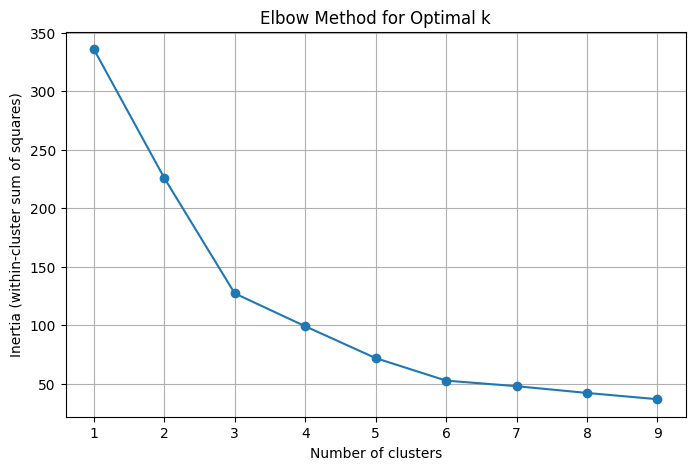

In [104]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.grid(True)
plt.show()

In [109]:
from sklearn.metrics import silhouette_score

# Test silhouette scores for various cluster counts
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'Silhouette score for k={k}: {score:.3f}')

Silhouette score for k=2: 0.313
Silhouette score for k=3: 0.395
Silhouette score for k=4: 0.365
Silhouette score for k=5: 0.392
Silhouette score for k=6: 0.426
Silhouette score for k=7: 0.397
Silhouette score for k=8: 0.374
Silhouette score for k=9: 0.373


In [110]:
# Optional: map clusters to tier labels (adjusted after exploring results)
cluster_labels = {
    0: 'Winners',
    1: 'Poor',
    2: 'Decent',
    3: 'Underperformers',
    4: 'Elite',
    5: 'Overperformers'
}
driver_summary['performance_tier'] = driver_summary['cluster'].map(cluster_labels)

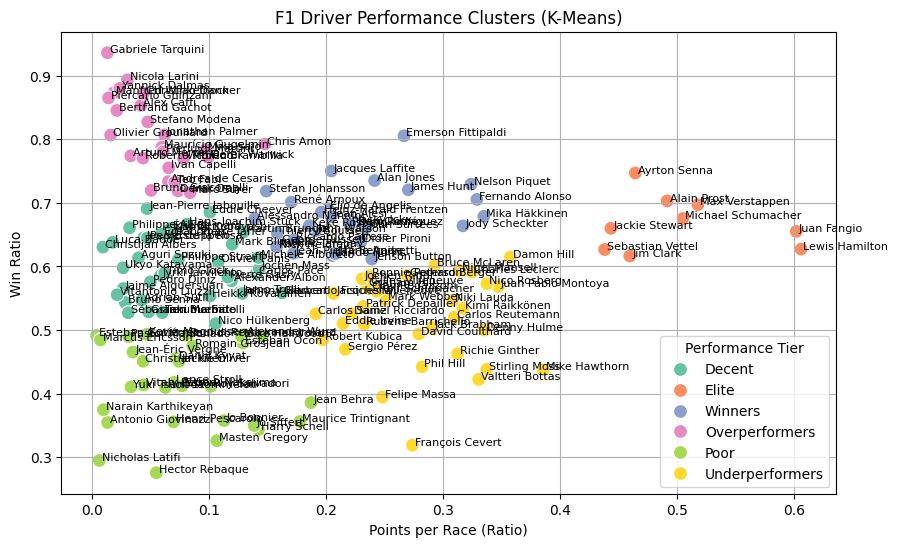

In [111]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=driver_summary, 
    x='ratio_points_per_race', 
    y='win_ratio', 
    hue='performance_tier', 
    palette='Set2', 
    s=100
)

for i, row in driver_summary.iterrows():
    plt.text(row['ratio_points_per_race'] + 0.002, row['win_ratio'], row['driver'], fontsize=8)

plt.title('F1 Driver Performance Clusters (K-Means)')
plt.xlabel('Points per Race (Ratio)')
plt.ylabel('Win Ratio')
plt.grid(True)
plt.legend(title='Performance Tier')
plt.show()

In [112]:
import plotly.express as px

fig = px.scatter(
    driver_summary,
    x='ratio_points_per_race',
    y='win_ratio',
    color='performance_tier',
    hover_name='driver',         # still keeps hover info
    text='driver',               # show name as label
    title='F1 Driver Performance Clusters (with Labels)',
    labels={
        'ratio_points_per_race': 'Points per Race (Ratio)',
        'win_ratio': 'Win Ratio'
    },
    width=1000,
    height=600
)

# Position the text labels
fig.update_traces(textposition='top center')

# Show plot
fig.show()